# Linear Regression

## Motivation: Predicting housing prices
* Let’s say we only know the average number of rooms in an area
* Aim is to predict the prize for a house in that area

## The Formal Regression Problem
Given a dataset of N instances, each instance consisting of:
* A feature vector xi ∈ RD are D-dimensional vectors ∀i ∈ {1, . . . , N }
* Target is yi ∈ R uni-dimensional ∀i ∈ {1, . . . , N }

*Objective:* Find a prediction model ˆy := f : RD → R that estimates y by
minimizing a loss J : R × R → R+:

Refined Objective: Find a parametric model ˆy := f : RD × W → R

In [149]:
# Import dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('BostonHousingDataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [151]:
# Dimensions of the Dataset
print(df.shape)

(506, 14)


In [152]:
# Remove MEDV outliers (MEDV=50.0)
df = df[~(df['MEDV'] >= 50.0)]

In [153]:
# RM - average number of rooms per dwelling
rm = df['RM']
rm.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [154]:
# Summarize the data to see the distribution of RM
rm.describe()

count    490.000000
mean       6.245471
std        0.653147
min        3.561000
25%        5.881000
50%        6.185000
75%        6.578000
max        8.780000
Name: RM, dtype: float64

In [155]:
# MEDV - Median value of owner-occupied homes in $1000's
medv = df['MEDV']
medv.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [156]:
# Summarize the data to see the distribution of MEDV
medv.describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

In [157]:
X = np.array(rm)
y = np.array(medv)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (490,)
Shape of y: (490,)


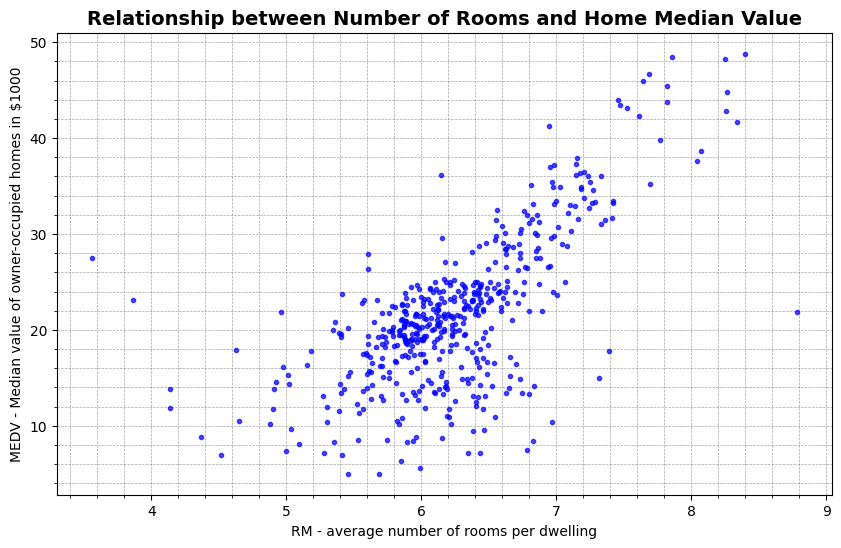

In [158]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

### Lets use Scipy for linear regression, we want to achive the same result by hand

In [159]:
from scipy import stats
fit_cheat = stats.linregress(X, y)
m = fit_cheat.slope
b = fit_cheat.intercept
print(f'y = {round(m, 2)}x + ({round(b, 2)})')

y = 8.27x + (-30.01)


In [ ]:
def model(x: np.array, m: float, b: float) -> float:
    return m * x + b

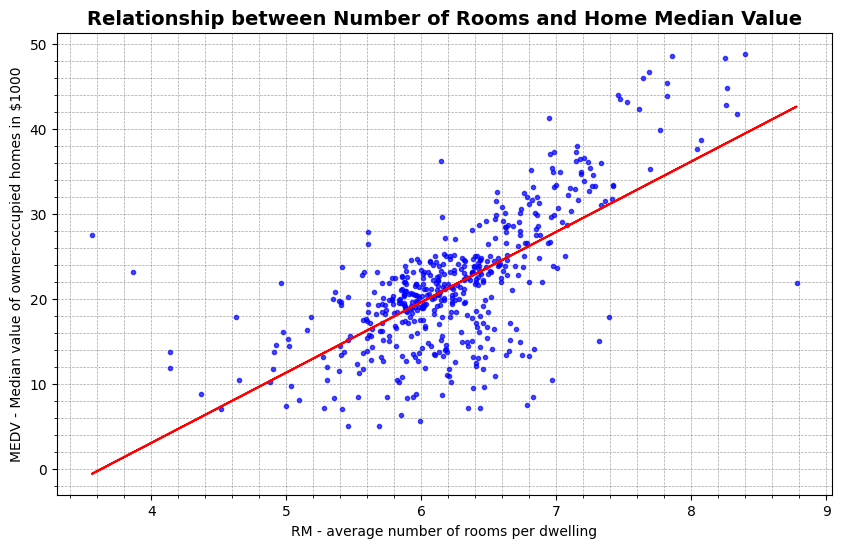

In [160]:
# Plotting with cheat
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, model(X, m=m, b=b), 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

## Option1: Analytical Approach To Find Weight Vector w
Assuming the slightly more elegant formulation for linear regression (in
augmented vector notation):



In [161]:
def model(x: np.array, m: float, b: float) -> float:
    return m * x + b

# Analytical solution
w = np.dot(np.dot((np.dot(X.T, X) ** -1), X.T), y)
print(w)

3.51612752001867


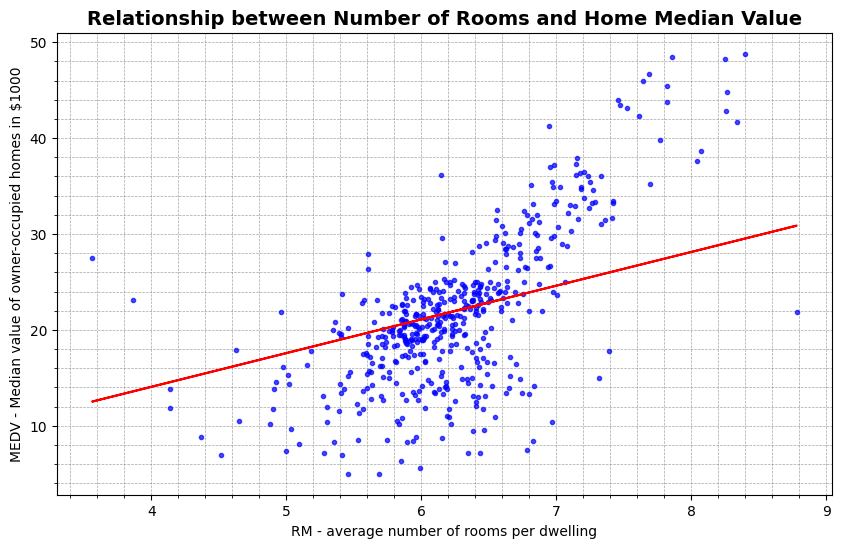

In [163]:
# Plotting with cheat
plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Rooms and Home Median Value', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'o', color='blue', markersize=3, alpha=0.7)
plt.plot(X, model(X, m=w, b=0.0), 'r', label='fitted line')
plt.xlabel('RM - average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

## Option2: Guess The Entries Of w And Try To Improve Them Iteratively